<h1><center>Supply Chain Management (Data Analysis) </center></h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('supply_train.csv')
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.shape

(16620, 25)

In [5]:
df.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


In [5]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [6]:
printmd('**No. of unique values** \n')
for col in df.columns:
    length = len(df[f'{col}'].unique())
    print(f'{col} : {length} ')

**No. of unique values** 


Unnamed: 0 : 16620 
Ware_house_ID : 16620 
WH_Manager_ID : 16620 
Location_type : 2 
WH_capacity_size : 3 
zone : 4 
WH_regional_zone : 6 
num_refill_req_l3m : 9 
transport_issue_l1y : 6 
Competitor_in_mkt : 12 
retail_shop_num : 4356 
wh_owner_type : 2 
distributor_num : 56 
flood_impacted : 2 
flood_proof : 2 
electric_supply : 2 
dist_from_hub : 217 
workers_num : 61 
wh_est_year : 29 
storage_issue_reported_l3m : 37 
temp_reg_mach : 2 
approved_wh_govt_certificate : 6 
wh_breakdown_l3m : 7 
govt_check_l3m : 32 
product_wg_ton : 4248 


In [7]:
printmd('**Unique values** \n')
for col in df.columns:
    values = df[f'{col}'].unique()
    print(f'{col} : {values} \n')

**Unique values** 


Unnamed: 0 : [    0     1     2 ... 16617 16618 16619] 

Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619'] 

WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619'] 

Location_type : ['Urban' 'Rural'] 

WH_capacity_size : ['Small' 'Large' 'Mid'] 

zone : ['West' 'North' 'South' 'East'] 

WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4'] 

num_refill_req_l3m : [3 0 1 7 8 4 6 5 2] 

transport_issue_l1y : [1 0 4 3 2 5] 

Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0] 

retail_shop_num : [4651 6217 4306 ... 2716 8344 7347] 

wh_owner_type : ['Rented' 'Company Owned'] 

distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20] 

flood_impacted : [0 1] 

flood_proof : [1 0] 

electric_supply : [1 0] 

dist_from_hub : [ 91 210 161 103 112 152  7

In [8]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [10]:
palette_color = sns.color_palette("crest")

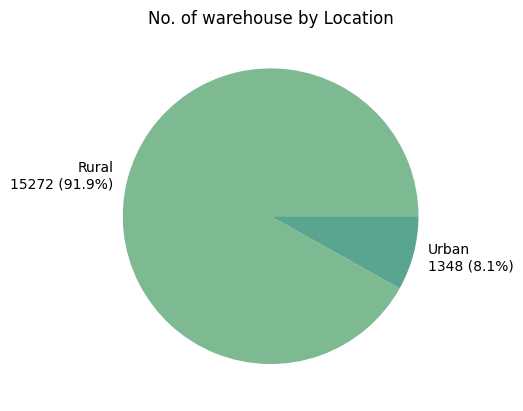

In [11]:
loc_count = df.Location_type.value_counts()

total_wh = sum(loc_count)
wh_percentages = [(size_wh / total_wh) * 100 for size_wh in loc_count]

count_percent = [f'{label}\n{size} ({percentage:.1f}%)' for 
                label, size, percentage in zip(loc_count.index, loc_count, wh_percentages)]

plt.pie(x=loc_count, labels=count_percent, colors=palette_color)
                                 
plt.title('No. of warehouse by Location')

plt.show()

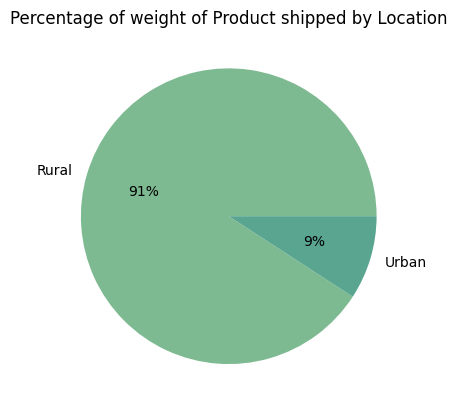

In [11]:
loc_group = df.groupby(['Location_type'])

loc_group_sum = loc_group.sum(numeric_only=True)

plt.pie(x = loc_group_sum['product_wg_ton'], labels = loc_group_sum['product_wg_ton'].index, 
        autopct = '%.0f%%', colors = palette_color)

plt.title('Percentage of weight of Product shipped by Location')

plt.show()

**Almost 92% of warehouses are situated in rural areas, and approximately 91% of the total products are shipped from warehouses in rural areas.**

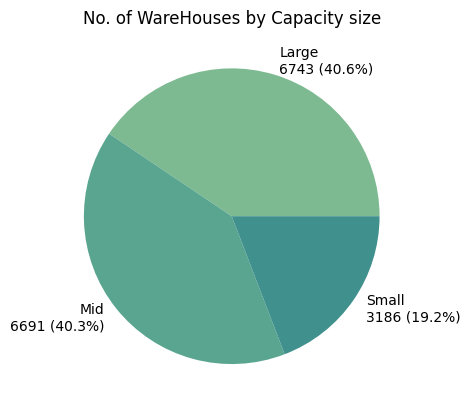

In [13]:
capacity_count = df.WH_capacity_size.value_counts()

total_cap = sum(capacity_count)
cap_percentages = [(size_cap / total_cap) * 100 for size_cap in capacity_count]

count_percent = [f'{label}\n{size} ({percentage:.1f}%)' for 
                label, size, percentage in zip(capacity_count.index, capacity_count, cap_percentages)]

plt.pie(x = capacity_count, labels = count_percent, colors = palette_color )

plt.title('No. of WareHouses by Capacity size')

plt.show()

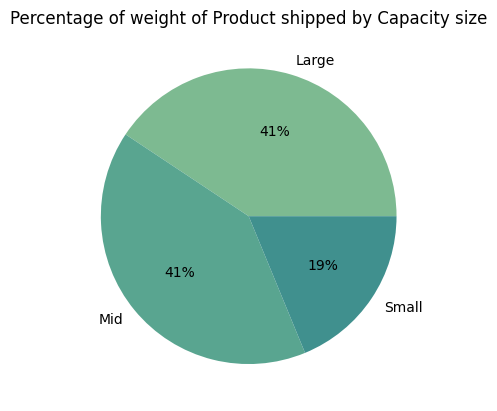

In [12]:
capacity_group = df.groupby(['WH_capacity_size'])

capacity_group_sum = capacity_group.sum(numeric_only = True)

plt.pie(x = capacity_group_sum['product_wg_ton'], labels = capacity_group_sum['product_wg_ton'].index, 
        autopct = '%.0f%%', colors = palette_color)

plt.title('Percentage of weight of Product shipped by Capacity size')

plt.show()

**Approximately 81% of warehouses are equipped with large or mid-range capacity, and they handle about 82% of the products that are shipped from these warehouses.**

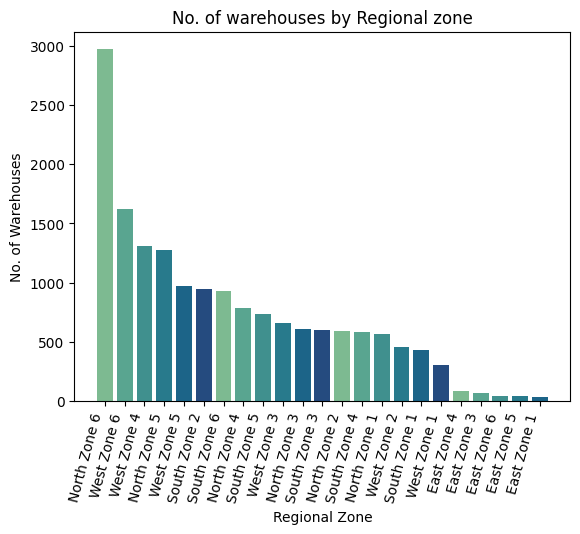

In [14]:
df['Regional_zone'] = df['zone'] + ' ' + df['WH_regional_zone']

zone_count = df.Regional_zone.value_counts()

plt.bar(x = zone_count.index ,height = zone_count, color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('No. of Warehouses')

plt.title('No. of warehouses by Regional zone')

plt.show()

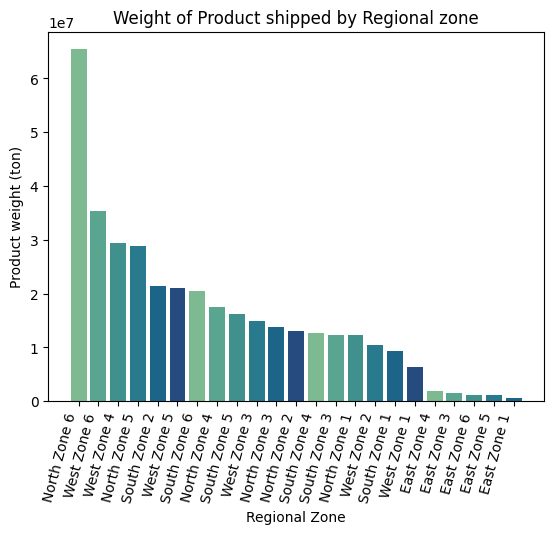

In [16]:
zone_group = df.groupby(['Regional_zone'])

zone_group_sum = zone_group.sum(numeric_only = True)

plt.bar(x = zone_group_sum['product_wg_ton'].sort_values(ascending = False).index, 
        height = zone_group_sum['product_wg_ton'].sort_values(ascending = False) , color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('Product weight (ton)')

plt.title('Weight of Product shipped by Regional zone')

plt.show()

**The majority of warehouses are located in North Zone 6, closely followed by West Zone 6. This distribution pattern is also reflected in the shipment of products by weight.**

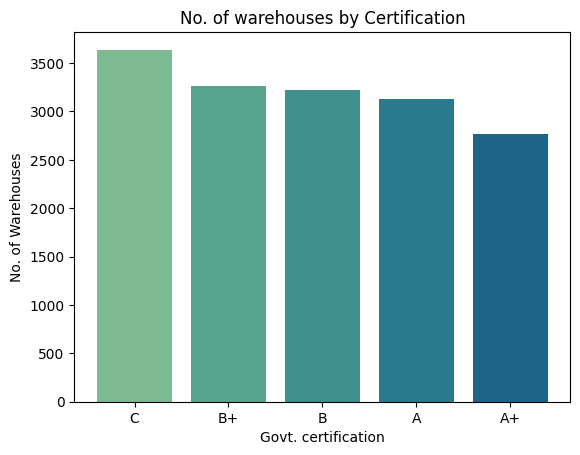

In [17]:
cert_count = df.approved_wh_govt_certificate.value_counts()

plt.bar(x = cert_count.index ,height = cert_count, color = palette_color)

plt.xlabel('Govt. certification')

plt.ylabel('No. of Warehouses')

plt.title('No. of warehouses by Certification')

plt.show()

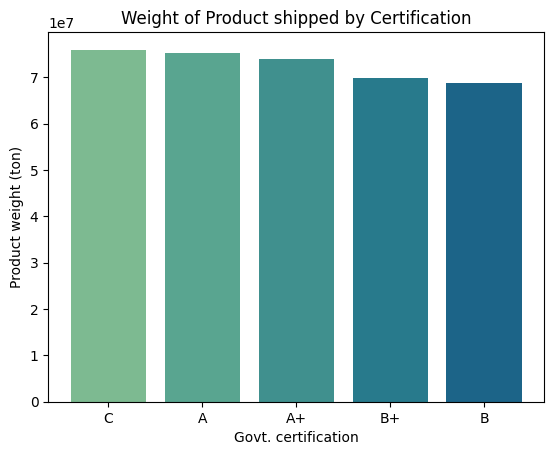

In [18]:
cert_group = df.groupby(['approved_wh_govt_certificate'])

cert_group_sum = cert_group.sum(numeric_only = True)

plt.bar(x = cert_group_sum['product_wg_ton'].sort_values(ascending = False).index, 
        height = cert_group_sum['product_wg_ton'].sort_values(ascending = False) , color = palette_color)

plt.xlabel('Govt. certification')

plt.ylabel('Product weight (ton)')

plt.title('Weight of Product shipped by Certification')

plt.show()

**The data provides valuable insights into the composition of warehouses in this dataset. Notably, the most prevalent certification level among these warehouses is 'C' Government certification, while 'A+' certification is relatively underrepresented, with only a minority of warehouses achieving this highest level of certification. Surprisingly, when it comes to the shipment of products, 'C' certified warehouses outperform their 'B+' and 'A+' certified counterparts. This suggests that, despite 'C' being the most common certification, these warehouses excel in terms of product shipments. Furthermore, 'A' and 'A+' certified warehouses secure the second and third positions in terms of product shipments, respectively, highlighting their competence even in the context of their limited presence in the dataset. Overall, this information underscores the impact of varying certification levels on warehouse performance in terms of product shipments.**



In [21]:
min_weight = df['product_wg_ton'].min()
print(f"Min. product weight shipped = {min_weight} ton\n")

max_weight = df['product_wg_ton'].max()
print(f"Max. product weight shipped = {max_weight} ton\n")

avg_weight = np.round(df['product_wg_ton'].mean())
print(f"Avg. product weight shipped = {avg_weight} ton\n")

Min. product weight shipped = 2093 ton

Max. product weight shipped = 55151 ton

Avg. product weight shipped = 22098.0 ton



In [17]:
printmd('**Details of warehouse having most number of Competitors** \n')

df[df['Competitor_in_mkt'] == df['Competitor_in_mkt'].max()]

**Details of warehouse having most number of Competitors** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
1568,1568,WH_101568,EID_51568,Rural,Small,East,Zone 6,8,0,12,4642,Rented,37,0,0,1,208,19.0,2020.0,6,1,C,1,15,8131,East Zone 6


**The warehouse with the highest number of competitors in the market is situated in a rural area, specifically in East Zone 6. The weight of products shipped from this warehouse exceeds the minimum value but falls significantly below the average of product weight shipped. This suggests that while the warehouse faces stiff competition in its market, it manages to maintain a level of product shipment that, while not the highest, is still above the minimum threshold. This may indicate efficient operations and market viability, even in a competitive rural location.**

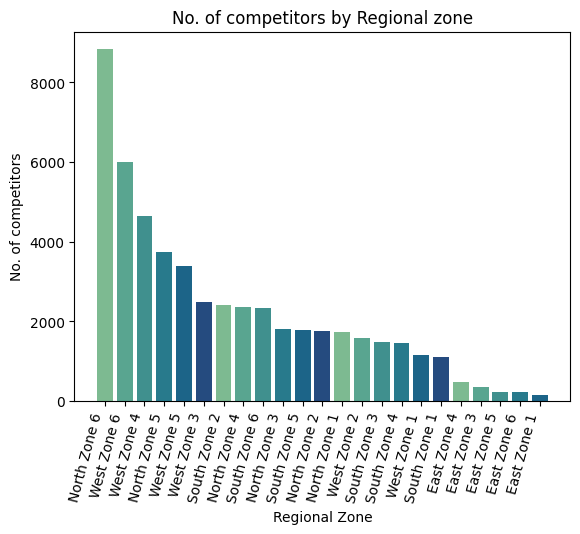

In [21]:
plt.bar(x = zone_group_sum['Competitor_in_mkt'].sort_values(ascending = False).index, 
        height = zone_group_sum['Competitor_in_mkt'].sort_values(ascending = False) , color = palette_color)

plt.xticks(rotation=75, ha='right')

plt.xlabel('Regional Zone')

plt.ylabel('No. of competitors')

plt.title('No. of competitors by Regional zone')

plt.show()

**The highest number of competitors is concentrated in North Zone 6, while East Zone has the least number of competitors. This indicates that North Zone 6 is a highly competitive market, possibly with more businesses or warehouses vying for market share. In contrast, East Zone seems to have fewer competitors, suggesting a potentially less crowded market or a different level of market development.**

In [116]:
print(f"Min. No. of workers = {df['workers_num'].min()}\n")

print(f"Max. No. of workers = {df['workers_num'].max()} \n")

print(f"Avg. No. of workers = {np.round((df['workers_num'].mean()))}")

Min. No. of workers = 10.0

Max. No. of workers = 98.0 

Avg. No. of workers = 29.0


In [18]:
printmd('**Details of warehouses having most number of workers** \n')

greater_60 = df[df['workers_num'] > 60]

greater_60

**Details of warehouses having most number of workers** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
266,266,WH_100266,EID_50266,Rural,Large,North,Zone 6,4,0,4,4943,Rented,30,0,0,1,183,62.0,2021.0,0,0,NaN,0,23,6123,North Zone 6
430,430,WH_100430,EID_50430,Rural,Large,West,Zone 5,3,0,4,3896,Rented,17,1,0,0,251,98.0,2009.0,16,1,B+,4,14,21144,West Zone 5
1101,1101,WH_101101,EID_51101,Rural,Mid,South,Zone 4,5,0,2,5650,Rented,52,1,0,1,201,61.0,2005.0,25,0,A,2,26,32085,South Zone 4
1757,1757,WH_101757,EID_51757,Rural,Small,West,Zone 6,4,0,2,5981,Rented,26,1,0,0,97,78.0,2010.0,22,0,B+,5,8,28110,West Zone 6
2569,2569,WH_102569,EID_52569,Rural,Small,North,Zone 6,5,3,2,5183,Rented,47,0,0,1,141,62.0,NaN,4,0,B,5,8,5087,North Zone 6
2859,2859,WH_102859,EID_52859,Rural,Large,South,Zone 5,4,0,3,4387,Company Owned,55,1,0,1,92,92.0,2015.0,16,1,A+,5,10,24117,South Zone 5
2907,2907,WH_102907,EID_52907,Rural,Small,South,Zone 6,7,0,2,4943,Company Owned,29,0,0,1,105,65.0,2013.0,20,0,B,1,2,24070,South Zone 6
3073,3073,WH_103073,EID_53073,Rural,Large,North,Zone 6,2,0,3,5368,Company Owned,70,0,0,1,92,64.0,NaN,24,1,B,5,28,30068,North Zone 6
3275,3275,WH_103275,EID_53275,Rural,Mid,South,Zone 2,2,0,4,5840,Rented,40,0,0,1,201,62.0,NaN,5,1,A,3,32,7066,South Zone 2
3513,3513,WH_103513,EID_53513,Urban,Large,South,Zone 6,4,0,1,4105,Company Owned,37,1,0,1,128,92.0,2014.0,13,0,A,1,29,18140,South Zone 6


In [70]:
most_avg = greater_60['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having most number of workers = {most_avg} ton\n")

mg_count = df.loc[(df['workers_num'] > 60) & (df['product_wg_ton'] > avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped greater than the average = {mg_count} \n")

ml_count = df.loc[(df['workers_num'] > 60) & (df['product_wg_ton'] < avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped less than the average = {ml_count} \n")

Avg. of product weight shipped from warehouse having most number of workers = 19554.485714285714 ton

No. of warehouses having product weight shipped greater than the average = 15 

No. of warehouses having product weight shipped less than the average = 20 



In [19]:
printmd('**Details of warehouse having least number of workers** \n')

df[df['workers_num'] < 20]

**Details of warehouse having least number of workers** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
11,11,WH_100011,EID_50011,Rural,Large,North,Zone 6,7,0,5,4627,Rented,40,0,0,0,225,16.0,2017.0,11,0,B,2,28,14115,North Zone 6
15,15,WH_100015,EID_50015,Rural,Mid,North,Zone 2,1,1,3,5062,Company Owned,50,0,0,1,190,19.0,NaN,4,0,B+,3,12,5094,North Zone 2
30,30,WH_100030,EID_50030,Rural,Mid,West,Zone 4,5,0,4,4552,Rented,67,0,0,0,230,17.0,2017.0,12,0,B+,5,11,15082,West Zone 4
31,31,WH_100031,EID_50031,Rural,Large,North,Zone 6,4,0,2,3540,Rented,21,0,0,0,164,19.0,2009.0,18,1,B+,6,23,21064,North Zone 6
53,53,WH_100053,EID_50053,Rural,Mid,North,Zone 2,6,1,2,3943,Rented,38,0,0,0,190,19.0,2008.0,18,0,A,4,1,23149,North Zone 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16571,16571,WH_116571,EID_66571,Rural,Small,South,Zone 6,8,0,4,4895,Rented,57,0,0,0,174,18.0,NaN,26,0,B+,5,9,30146,South Zone 6
16578,16578,WH_116578,EID_66578,Rural,Large,North,Zone 6,7,0,4,4749,Rented,35,0,0,0,57,18.0,2004.0,24,1,A+,6,28,34079,North Zone 6
16584,16584,WH_116584,EID_66584,Rural,Mid,West,Zone 4,0,0,3,5863,Rented,44,0,0,0,222,19.0,NaN,24,0,A,2,11,30129,West Zone 4
16611,16611,WH_116611,EID_66611,Rural,Mid,North,Zone 3,0,1,4,4333,Company Owned,17,0,0,0,196,19.0,NaN,13,0,A,4,19,18113,North Zone 3


In [22]:
most_avg = df[df['workers_num'] < 20]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having least number of workers = {most_avg} ton\n")

lg_count = df.loc[(df['workers_num'] < 20) & (df['product_wg_ton'] > avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped greater than the average = {lg_count} \n")

ll_count = df.loc[(df['workers_num'] < 20) & (df['product_wg_ton'] < avg_weight), 'Ware_house_ID'].count()
print(f"No. of warehouses having product weight shipped less than the average = {ll_count} \n")

Avg. of product weight shipped from warehouse having least number of workers = 22673.5193220339 ton

No. of warehouses having product weight shipped greater than the average = 764 

No. of warehouses having product weight shipped less than the average = 709 



**The data highlights distinct patterns among warehouses based on worker numbers and product weight shipped. Firstly, 35 warehouses stand out with more than 70 workers. Surprisingly, despite their sizable workforce, the average product weight shipped from these warehouses falls below the overall average, signaling potential efficiency challenges in managing the workforce-productivity balance.**

**Moreover, a subset of 20 warehouses falls short in terms of product weight shipped, while 15 exceed the overall average. This variation among warehouses suggests differing levels of operational effectiveness and market demands.**

**On the other end of the spectrum, a significant portion of 1,475 warehouses operates with less than 20 workers, yet collectively they exhibit a slightly higher average product weight shipped compared to the overall average. This intriguing finding underscores the potential for lean, streamlined operations in smaller workforce environments.**

**In this context, among the 1,475 warehouses with fewer than 20 workers, 764 manage to surpass the overall average for product weight shipped, while 709 fall behind. This indicates that smaller teams, when properly managed, can excel in product shipments, or conversely, larger teams might need further optimization.**

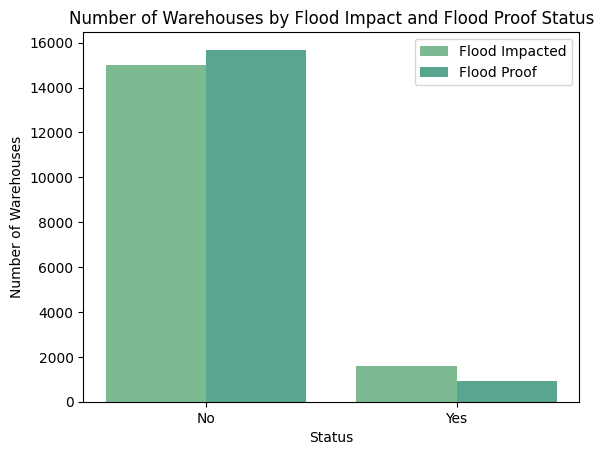

In [93]:
fi_count = df['flood_impacted'].value_counts()
fp_count = df['flood_proof'].value_counts()

index = fi_count.index
labels = ["Yes" if value == 1 else "No" for value in index]

X_axis = np.arange(2)

bar_width = 0.4

plt.bar(X_axis - bar_width / 2, fi_count, bar_width, label='Flood Impacted', color=palette_color[0])
plt.bar(X_axis + bar_width / 2, fp_count, bar_width, label='Flood Proof', color=palette_color[1])

plt.xlabel('Status')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses by Flood Impact and Flood Proof Status')
plt.xticks(X_axis, labels)
plt.legend()

plt.show()

**The majority of warehouses are located in areas not impacted by floods and do not have flood-proof measures in place. A relatively small number of warehouses are situated in flood-impacted areas, and among these, those with flood-proofing measures are even fewer in number.**

In [23]:
avg_req = np.round(df['num_refill_req_l3m'].mean())
print(f"Avg. number of refill requets in last 3 months = {avg_req} \n")


avg_transport = np.round(df['transport_issue_l1y'].mean())
print(f"Avg. number of transport issued for last 1 year = {avg_transport} \n")

Avg. number of refill requets in last 3 months = 4.0 

Avg. number of transport issued for last 1 year = 1.0 



In [102]:
print(f"Min. No. of retail shops = {df['retail_shop_num'].min()}\n")

print(f"Max. No. of retail shops = {df['retail_shop_num'].max()} \n")

print(f"Avg. No. of retail shops = {np.round((df['retail_shop_num'].mean()))}")

Min. No. of retail shops = 1821

Max. No. of retail shops = 11008 

Avg. No. of retail shops = 4984.0


In [24]:
printmd('**Details of warehouses having least number of retail shops** \n')

less_3k = df[df['retail_shop_num'] < 2500]

less_3k

**Details of warehouses having least number of retail shops** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
815,815,WH_100815,EID_50815,Rural,Mid,South,Zone 4,7,0,5,2487,Company Owned,20,0,0,1,153,21.0,2021.0,5,1,C,1,26,6139,South Zone 4
2269,2269,WH_102269,EID_52269,Rural,Large,North,Zone 6,0,1,2,1980,Rented,54,0,0,1,123,36.0,NaN,16,0,B+,4,23,19078,North Zone 6
2678,2678,WH_102678,EID_52678,Rural,Large,North,Zone 6,6,0,3,2413,Company Owned,59,0,0,0,152,23.0,2011.0,19,0,B+,4,28,22071,North Zone 6
2909,2909,WH_102909,EID_52909,Rural,Mid,North,Zone 2,4,0,5,2438,Rented,44,0,0,1,105,24.0,2009.0,19,1,A+,6,18,24086,North Zone 2
2982,2982,WH_102982,EID_52982,Rural,Large,North,Zone 6,4,3,5,1905,Rented,51,0,0,0,219,19.0,2017.0,5,1,B,2,28,6106,North Zone 6
3807,3807,WH_103807,EID_53807,Rural,Mid,West,Zone 3,1,0,4,2385,Company Owned,44,0,0,1,87,35.0,NaN,24,0,A+,4,19,32064,West Zone 3
4312,4312,WH_104312,EID_54312,Rural,Mid,West,Zone 4,4,0,4,2148,Company Owned,57,0,0,1,56,52.0,2023.0,0,0,NaN,0,26,6107,West Zone 4
4659,4659,WH_104659,EID_54659,Rural,Mid,North,Zone 4,7,1,3,1871,Rented,50,0,0,0,191,27.0,NaN,4,1,C,3,26,6131,North Zone 4
4747,4747,WH_104747,EID_54747,Rural,Mid,South,Zone 4,4,3,1,2453,Company Owned,69,1,0,1,240,23.0,NaN,14,1,A+,3,26,19105,South Zone 4
5359,5359,WH_105359,EID_55359,Rural,Large,South,Zone 5,5,0,1,2314,Company Owned,45,0,0,1,239,28.0,2008.0,17,0,B,2,14,21146,South Zone 5


In [113]:
rsl_count = df.loc[(df['retail_shop_num'] < 2500), 'Ware_house_ID'].count()
print(f"No. of warehouses having least number of retail shops = {rsl_count} \n")

rsl_avg = df[df['retail_shop_num'] < 2500]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having least number retail shops = {rsl_avg} ton\n")

No. of warehouses having leas number of retail shops = 50 

Avg. of product weight shipped from warehouse having least number retail shops = 23845.68 ton



In [25]:
printmd('**Details of warehouses having most number of retail shops** \n')

greater_9k = df[df['retail_shop_num'] > 9000]

greater_9k

**Details of warehouses having most number of retail shops** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
283,283,WH_100283,EID_50283,Rural,Mid,West,Zone 3,8,0,4,9581,Company Owned,23,0,0,1,218,28.0,NaN,4,0,A,1,19,5059,West Zone 3
825,825,WH_100825,EID_50825,Rural,Large,North,Zone 6,2,0,2,9389,Company Owned,42,0,0,0,155,26.0,NaN,23,0,A,4,28,31060,North Zone 6
1409,1409,WH_101409,EID_51409,Rural,Small,South,Zone 6,4,0,2,9630,Company Owned,41,0,0,1,267,37.0,2013.0,12,1,B,1,9,15087,South Zone 6
1749,1749,WH_101749,EID_51749,Rural,Small,South,Zone 6,5,0,2,9318,Company Owned,36,0,1,1,187,30.0,2012.0,14,0,C,4,15,19112,South Zone 6
2340,2340,WH_102340,EID_52340,Rural,Small,West,Zone 6,7,0,3,9094,Rented,34,0,0,1,95,25.0,2012.0,18,0,B,3,15,23136,West Zone 6
2666,2666,WH_102666,EID_52666,Rural,Small,South,Zone 6,5,0,2,9007,Company Owned,29,0,0,1,176,55.0,2000.0,31,1,A+,3,9,44101,South Zone 6
2883,2883,WH_102883,EID_52883,Rural,Small,South,Zone 6,5,0,3,9431,Company Owned,41,1,0,1,92,37.0,2011.0,19,1,A+,4,2,24133,South Zone 6
2952,2952,WH_102952,EID_52952,Rural,Small,South,Zone 6,7,0,2,9694,Company Owned,58,0,0,1,255,27.0,2011.0,22,1,A+,5,15,30144,South Zone 6
3105,3105,WH_103105,EID_53105,Rural,Small,South,Zone 6,5,0,2,9194,Rented,65,0,0,1,147,32.0,2011.0,18,0,B+,5,2,20081,South Zone 6
3945,3945,WH_103945,EID_53945,Rural,Mid,South,Zone 2,7,0,3,9187,Company Owned,69,0,0,1,108,33.0,2012.0,20,0,C,4,22,25100,South Zone 2


In [114]:
rsg_count = df.loc[(df['retail_shop_num'] > 9000), 'Ware_house_ID'].count()
print(f"No. of warehouses having most number of retail shops = {rsg_count} \n")

rsg_avg = df[df['retail_shop_num'] < 9000]['product_wg_ton'].mean()
print(f"Avg. of product weight shipped from warehouse having most number retail shops = {rsg_avg} ton\n")

No. of warehouses having most number of retail shops = 51 

Avg. of product weight shipped from warehouse having most number retail shops = 22093.691713440763 ton



**In our analysis, we found distinct patterns among warehouses with retail shops. Among the 50 warehouses housing fewer than 2,500 retail shops, the average product weight shipped stands at an impressive 23,845.68 tons. This figure surpasses the overall average, indicating these warehouses efficiently manage their product shipments to meet demand and maintain operational efficiency.**

**On the other hand, the 51 warehouses with more extensive retail shop networks, exceeding 9,000 shops, exhibit an average product weight shipped of 22,093 tons. Remarkably, this is closely aligned with the overall average, suggesting a robust level of consistency in handling product shipments. These insights shed light on the diverse approaches to warehouse operations in relation to the number of retail shops, with different strategies for optimizing product shipments.**

In [28]:
printmd('**Details of warehouse of having most weight of product shipped** \n')

df[df['product_wg_ton'] == df['product_wg_ton'].max()]

**Details of warehouse of having most weight of product shipped** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
9426,9426,WH_109426,EID_59426,Rural,Mid,South,Zone 3,2,0,2,5190,Company Owned,56,0,0,1,144,33.0,NaN,39,1,A,3,19,55151,South Zone 3


In [29]:
printmd('**Details of warehouse of having lowest weight of product shipped** \n')

df[df['product_wg_ton'] == df['product_wg_ton'].min()]

**Details of warehouse of having lowest weight of product shipped** 


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Regional_zone
8602,8602,WH_108602,EID_58602,Rural,Large,North,Zone 6,1,5,3,5904,Company Owned,43,0,0,0,231,23.0,NaN,0,0,NaN,0,23,2093,North Zone 6


**The data reveals an intriguing distribution pattern in terms of product weight shipped. Warehouses with both the lowest and the highest product weight shipped are primarily located in rural areas, indicating a wide spectrum of performance in these regions.**

**One striking example is WH_108602, situated in North Zone 6. Surprisingly, WH_108602 holds the distinction of having the lowest product weight shipped among the warehouses. This underscores the significant variance in performance across different warehouses, with WH_108602 demonstrating challenges in achieving substantial product shipments.**

**In contrast, another noteworthy warehouse is WH_109426 in South Zone 3, employing 33 workers, which is four more than the overall average. WH_109426 stands out as the most shipped warehouse in terms of product weight, showcasing its efficiency and effective workforce utilization.**

In [117]:
average = df['product_wg_ton'].mean()

print(f"No. of Warehouses shipped product weight greater than overall average = {(df['product_wg_ton'] > average).sum()}\n")

print(f"No. of Warehouses shipped product weight less than overall average = {(df['product_wg_ton'] < average).sum()}")

No. of Warehouses shipped product weight greater than overall average = 8313

No. of Warehouses shipped product weight less than overall average = 8307


**In conclusion, the data analysis provides valuable insights into various aspects of warehouse operations and distribution patterns. Key findings include:**

* The prevalence of warehouses in rural areas, with around 92% of warehouses located in such regions, and approximately 91% of products are shipped from these rural warehouses.

* A majority of warehouses, around 81%, possess large or mid-range storage capacity and are responsible for handling approximately 82% of the total product shipments.

* The North Zone 6 dominates the geographical distribution of warehouses, closely followed by the West Zone 6. This geographical pattern is mirrored in the shipment of products by weight.

* C Government certification is the most common among warehouses, with A+ certification being relatively underrepresented. However, concerning product shipments, C certified warehouses outperform their B+ and A+ counterparts.

* The warehouse with the most competitors is located in a rural area, specifically East Zone 6. Although it faces fierce competition, it manages to maintain a significant level of product shipments, showcasing efficient operations in a competitive rural market.

* The highest number of competitors is concentrated in North Zone 6, while East Zone experiences the least competition, indicating regional variations in market dynamics.

* Analysis of worker numbers and product weight shipped highlights the diversity among warehouses. Larger workforces do not necessarily correlate with higher product weights shipped, and smaller teams can excel with proper management.

* Flood impact and flood-proofing measures vary among warehouses, with most warehouses located in non-flood-impacted areas without flood-proofing measures.

* On average, warehouses issue four refill requests in the last three months, indicating the frequency of restocking needs. Additionally, the average number of transport requests issued per warehouse in the last year is one, reflecting the periodic need for transportation services.

* Warehouses with varying numbers of retail shops display distinct average product weights shipped, with some surpassing the overall average while others closely align with it. These findings provide insights into the relationship between retail shop networks and product shipments.

* Notably, warehouse performance varies widely, with some achieving substantial product weights shipped, while others face challenges in maintaining high shipment volumes.

**Overall, these findings contribute to a better understanding of warehouse operations, performance, and distribution dynamics, offering valuable insights for informed decision-making and optimization of warehouse logistics.**

## Data Analysis (For model building)

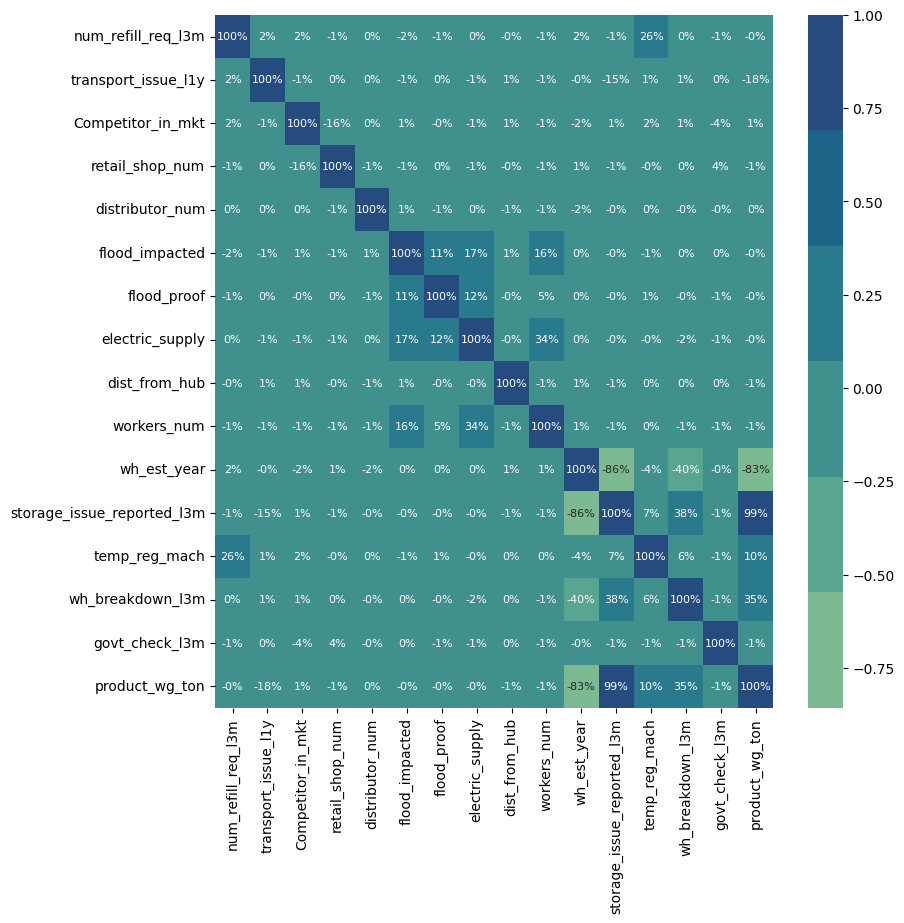

In [152]:
num_col = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 
           'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
           'storage_issue_reported_l3m', 'temp_reg_mach' , 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

correlation = df[num_col].corr()

plt.figure(figsize = (9,9))

sns.heatmap(correlation, annot = True, annot_kws={"fontsize":8}, fmt=".0%", cmap= palette_color)

plt.show()

**"Upon conducting a comprehensive analysis, we've identified three numerical features that exhibit correlations with 'product weight shipped.' These key features are as follows:**

**Firstly, 'Storage issue reported in the last 3 months' reveals a positive correlation with 'product weight shipped.' This suggests that an escalation in reported storage issues aligns with a higher volume of product weight being shipped.**

**On the other hand, 'Warehouse establishment year' demonstrates a negative correlation with 'product weight shipped.' This indicates that as the establishment year of a warehouse advances, there's a decline in the volume of product weight being shipped from that warehouse.**

**Lastly, 'Warehouse breakdown' showcases a moderate positive correlation, approximately 35%, with 'product weight shipped.' Although this correlation is relatively weaker, it still hints at a positive relationship between warehouse breakdown incidents and the amount of product weight shipped.**

**With these insights in mind, we have chosen to focus on these three numerical features for training our predictive model. They hold the potential to enhance our understanding and forecasting of product shipment patterns within warehouses, contributing to more effective warehouse management and logistics planning.**

Text(0.5, 1.0, 'Product weight by Location')

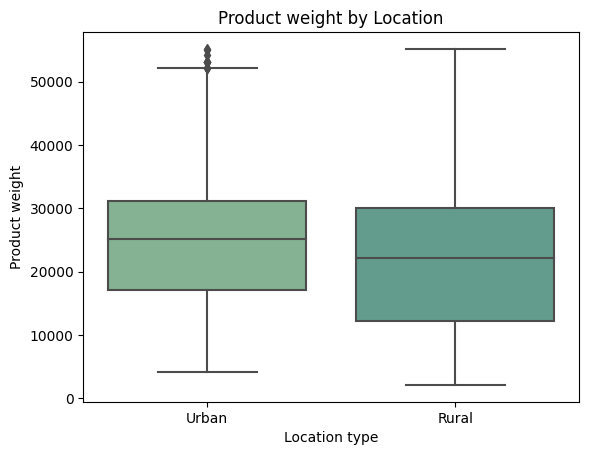

In [154]:
sns.boxplot(data = df, x= df['Location_type'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Location type')

plt.ylabel('Product weight')

plt.title('Product weight by Location')

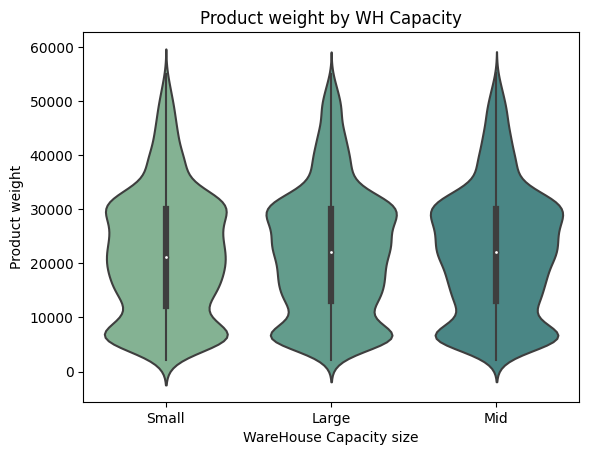

In [155]:
sns.violinplot(data = df, x= df['WH_capacity_size'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('WareHouse Capacity size')

plt.ylabel('Product weight')

plt.title('Product weight by WH Capacity')

plt.show()

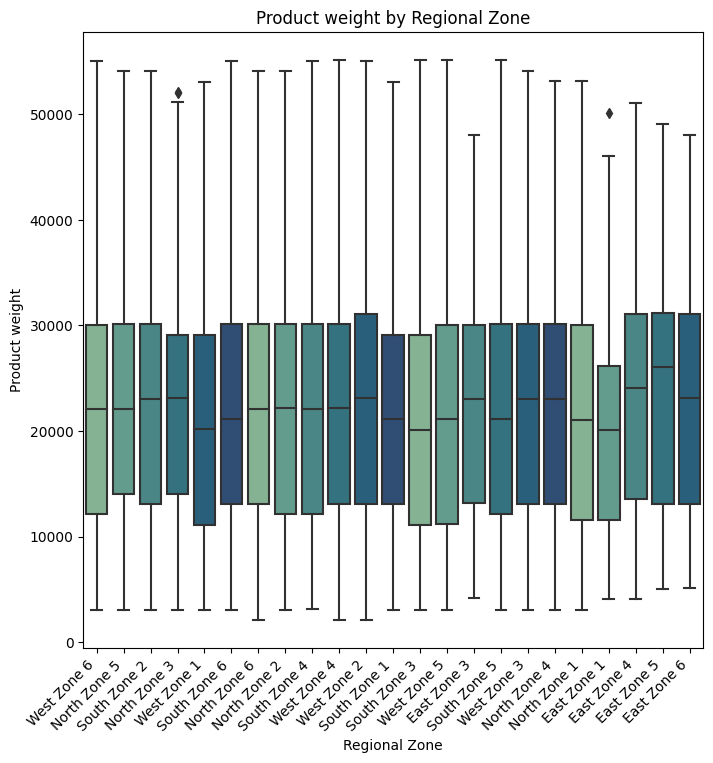

In [156]:
plt.figure(figsize = (8,8))

sns.boxplot(data = df, x= df['Regional_zone'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Regional Zone')

plt.ylabel('Product weight')

plt.title('Product weight by Regional Zone')

plt.xticks(rotation=45, ha='right')

plt.show()

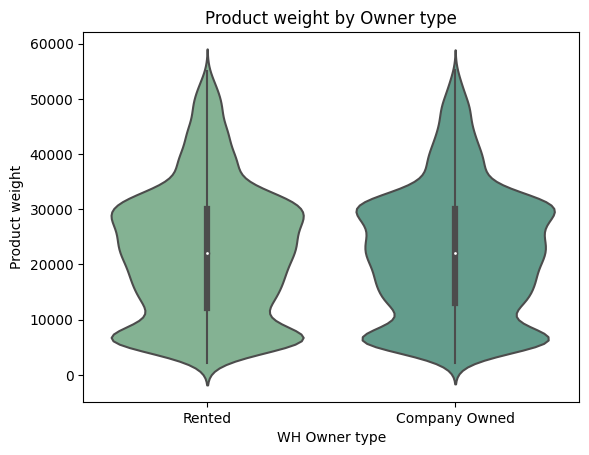

In [157]:
sns.violinplot(data = df, x= df['wh_owner_type'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('WH Owner type')

plt.ylabel('Product weight')

plt.title('Product weight by Owner type')

plt.show()

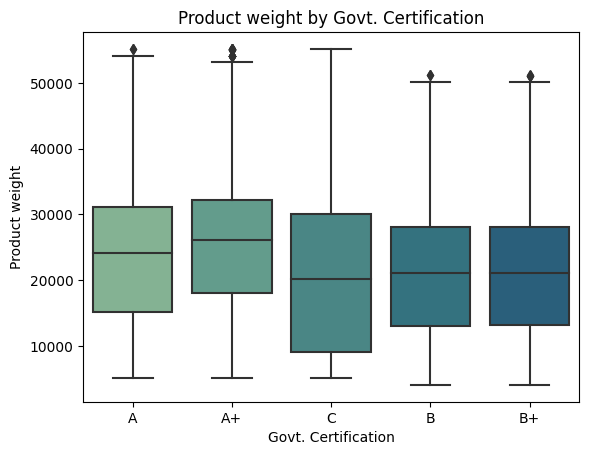

In [158]:
sns.boxplot(data = df, x= df['approved_wh_govt_certificate'], y =df['product_wg_ton'], palette = palette_color)

plt.xlabel('Govt. Certification')

plt.ylabel('Product weight')

plt.title('Product weight by Govt. Certification')

plt.show()

**Based on the preceding analysis, it is evident that certain categorical features, such as "location type," "regional zone," and "certification," exhibit a significant and noteworthy dependency on the "product weight shipped." On the other hand, features like "owner type" and "storage capacity" show a relatively weaker dependency on this variable.**

**As a result, all of these categorical features will be included in our model training process.**

In [159]:
train_df = df[['wh_est_year', 'storage_issue_reported_l3m','wh_breakdown_l3m','Location_type',
               'WH_capacity_size','wh_owner_type', 'approved_wh_govt_certificate','Regional_zone','product_wg_ton']]

In [160]:
train_df.head()

,wh_est_year,storage_issue_reported_l3m,wh_breakdown_l3m,Location_type,WH_capacity_size,wh_owner_type,approved_wh_govt_certificate,Regional_zone,product_wg_ton
0,NaN,13,5,Urban,Small,Rented,A,West Zone 6,17115
1,NaN,4,3,Rural,Large,Company Owned,A,North Zone 5,5074
2,NaN,17,6,Rural,Mid,Company Owned,A,South Zone 2,23137
3,NaN,17,3,Rural,Mid,Rented,A+,North Zone 3,22115
4,2009.0,18,6,Rural,Large,Company Owned,C,North Zone 5,24071


In [161]:
train_df.isnull().sum()

wh_est_year                     7860
storage_issue_reported_l3m         0
wh_breakdown_l3m                   0
Location_type                      0
WH_capacity_size                   0
wh_owner_type                      0
approved_wh_govt_certificate     599
Regional_zone                      0
product_wg_ton                     0
dtype: int64

In [162]:
train_year = train_df['wh_est_year'].mode()[0]

train_certificate = train_df['approved_wh_govt_certificate'].mode()[0]

train_df.loc[train_df['wh_est_year'].isnull(), 'wh_est_year'] = train_year

train_df.loc[train_df['approved_wh_govt_certificate'].isnull(), 'approved_wh_govt_certificate'] = train_certificate

In [163]:
def outlier_remover(data, columns):
    for col in columns:
        Q1  = data[f'{col}'].quantile(0.25)
        Q3  = data[f'{col}'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df_new = data[(data[f'{col}'] > lower) & (data[f'{col}'] < upper)]
        return df_new

In [164]:
numerical_columns = ['storage_issue_reported_l3m','wh_breakdown_l3m', 'product_wg_ton']

final_train_df = outlier_remover(train_df, numerical_columns)

In [165]:
final_train_df.shape

(16620, 9)

In [166]:
final_train_df.isnull().sum()

wh_est_year                     0
storage_issue_reported_l3m      0
wh_breakdown_l3m                0
Location_type                   0
WH_capacity_size                0
wh_owner_type                   0
approved_wh_govt_certificate    0
Regional_zone                   0
product_wg_ton                  0
dtype: int64

In [167]:
final_train_df.to_csv('train_df.csv')